In [79]:
import sys
import os
import glob
import re

import pandas as pd
import pandas_profiling as pdp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv('../processed_data/train_v2.csv')
df.head(1)

,id,y,location,access,layout,age,direction,area,floor,bath_toilet,...,enviroment,structure,contact_period,max_floor,room_num,L,D,K,S,north
0,1,75000,東京都北区滝野川３丁目,都営三田線\t西巣鴨駅\t徒歩4分\t\t埼京線\t板橋駅\t徒歩14分\t\t都電荒川線\...,1K,117,南東,20.01,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,...,【小学校】 495m\t【大学】 461m\t【小学校】 962m\t【公園】 1103m\...,7,2年間,12,1,0,0,1,0,0


In [81]:
df.columns

Index(['id', 'y', 'location', 'access', 'layout', 'age', 'direction', 'area',
       'floor', 'bath_toilet', 'kitchen', 'broadcast_com', 'facilities',
       'parking', 'enviroment', 'structure', 'contact_period', 'max_floor',
       'room_num', 'L', 'D', 'K', 'S', 'north'],
      dtype='object')

In [82]:
df = df.loc[:,['id', 'age','area','floor', 'structure', 'max_floor',
       'room_num', 'L', 'D', 'K', 'S', 'north', 'y']]
df.head()

,id,age,area,floor,structure,max_floor,room_num,L,D,K,S,north,y
0,1,117,20.01,1,7,12,1,0,0,1,0,0,75000
1,2,538,16.50,5,2,10,1,0,0,0,0,0,76000
2,3,102,22.05,12,7,15,1,0,0,1,0,0,110000
3,4,352,60.48,3,7,4,2,1,1,1,0,0,150000
4,5,379,39.66,1,1,2,2,0,1,1,0,0,74000


In [83]:
X, y = df.loc[:,'age':'north'], df['y']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=0)

In [85]:
X_train

,age,area,floor,structure,max_floor,room_num,L,D,K,S,north
14918,156,25.90,4,7,14,1,0,0,1,0,0
28891,179,27.03,7,7,7,1,0,0,1,0,0
18838,287,46.30,2,7,5,3,0,1,1,0,0
25857,269,33.52,2,7,3,1,0,0,1,0,0
26249,337,28.80,2,7,3,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13123,181,50.01,1,4,2,2,0,1,1,0,0
19648,0,25.80,2,2,4,1,0,0,1,0,0
9845,388,36.72,2,1,2,1,0,1,1,0,0
10799,374,19.00,1,1,2,1,0,0,0,0,0


In [86]:
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

In [87]:
params = {
        'task' : 'train',
        'boosting_type' : 'gbdt',
        'objective' : 'regression',
        'metric' : 'rmse',
}

In [88]:
model = lgb.train(params, lgb_train, valid_sets=lgb_eval,num_boost_round=10000)

[1]	valid_0's rmse: 68747.7
[2]	valid_0's rmse: 64391.7
[3]	valid_0's rmse: 60812.7
[4]	valid_0's rmse: 57520.3
[5]	valid_0's rmse: 54593.8
[6]	valid_0's rmse: 52104
[7]	valid_0's rmse: 50107.8
[8]	valid_0's rmse: 48263.6
[9]	valid_0's rmse: 46636.7
[10]	valid_0's rmse: 45205.2
[11]	valid_0's rmse: 44108.6
[12]	valid_0's rmse: 43040.4
[13]	valid_0's rmse: 42161.6
[14]	valid_0's rmse: 41415.6
[15]	valid_0's rmse: 40740.6
[16]	valid_0's rmse: 40146.4
[17]	valid_0's rmse: 39704.1
[18]	valid_0's rmse: 39329.9
[19]	valid_0's rmse: 38949.7
[20]	valid_0's rmse: 38664.3
[21]	valid_0's rmse: 38349.2
[22]	valid_0's rmse: 38088.4
[23]	valid_0's rmse: 37891.3
[24]	valid_0's rmse: 37665.8
[25]	valid_0's rmse: 37469.8
[26]	valid_0's rmse: 37303.7
[27]	valid_0's rmse: 37237.3
[28]	valid_0's rmse: 37033.5
[29]	valid_0's rmse: 36935.1
[30]	valid_0's rmse: 36767.7
[31]	valid_0's rmse: 36710
[32]	valid_0's rmse: 36680.7
[33]	valid_0's rmse: 36573.3
[34]	valid_0's rmse: 36463.1
[35]	valid_0's rmse: 36414.

[493]	valid_0's rmse: 32078.1
[494]	valid_0's rmse: 32072.4
[495]	valid_0's rmse: 32074.7
[496]	valid_0's rmse: 32071.4
[497]	valid_0's rmse: 32070.5
[498]	valid_0's rmse: 32069
[499]	valid_0's rmse: 32066.1
[500]	valid_0's rmse: 32062.8
[501]	valid_0's rmse: 32060.9
[502]	valid_0's rmse: 32060.9
[503]	valid_0's rmse: 32057.4
[504]	valid_0's rmse: 32057
[505]	valid_0's rmse: 32044.3
[506]	valid_0's rmse: 32059
[507]	valid_0's rmse: 32058.3
[508]	valid_0's rmse: 32046.5
[509]	valid_0's rmse: 32054.5
[510]	valid_0's rmse: 32048.3
[511]	valid_0's rmse: 32044.6
[512]	valid_0's rmse: 32042.5
[513]	valid_0's rmse: 32049.4
[514]	valid_0's rmse: 32047.5
[515]	valid_0's rmse: 32042.7
[516]	valid_0's rmse: 32024.4
[517]	valid_0's rmse: 32023.2
[518]	valid_0's rmse: 32031.4
[519]	valid_0's rmse: 32012.9
[520]	valid_0's rmse: 32009.3
[521]	valid_0's rmse: 32018.2
[522]	valid_0's rmse: 32016.5
[523]	valid_0's rmse: 32013.9
[524]	valid_0's rmse: 32005
[525]	valid_0's rmse: 31976.4
[526]	valid_0's rm

[970]	valid_0's rmse: 31688.5
[971]	valid_0's rmse: 31683.3
[972]	valid_0's rmse: 31679
[973]	valid_0's rmse: 31681.1
[974]	valid_0's rmse: 31676.9
[975]	valid_0's rmse: 31682.4
[976]	valid_0's rmse: 31681.4
[977]	valid_0's rmse: 31677.6
[978]	valid_0's rmse: 31679.8
[979]	valid_0's rmse: 31673.5
[980]	valid_0's rmse: 31685.4
[981]	valid_0's rmse: 31697.7
[982]	valid_0's rmse: 31699.9
[983]	valid_0's rmse: 31698.7
[984]	valid_0's rmse: 31705.6
[985]	valid_0's rmse: 31716.4
[986]	valid_0's rmse: 31716.4
[987]	valid_0's rmse: 31724.7
[988]	valid_0's rmse: 31728
[989]	valid_0's rmse: 31724.5
[990]	valid_0's rmse: 31720.9
[991]	valid_0's rmse: 31726.2
[992]	valid_0's rmse: 31724.1
[993]	valid_0's rmse: 31725.4
[994]	valid_0's rmse: 31724.3
[995]	valid_0's rmse: 31724.3
[996]	valid_0's rmse: 31720.1
[997]	valid_0's rmse: 31726.2
[998]	valid_0's rmse: 31713.7
[999]	valid_0's rmse: 31713.3
[1000]	valid_0's rmse: 31705.7
[1001]	valid_0's rmse: 31705.6
[1002]	valid_0's rmse: 31711.1
[1003]	vali

[1449]	valid_0's rmse: 31610.1
[1450]	valid_0's rmse: 31610
[1451]	valid_0's rmse: 31609.4
[1452]	valid_0's rmse: 31609.3
[1453]	valid_0's rmse: 31608.4
[1454]	valid_0's rmse: 31607.9
[1455]	valid_0's rmse: 31608.8
[1456]	valid_0's rmse: 31607.6
[1457]	valid_0's rmse: 31605.3
[1458]	valid_0's rmse: 31611.4
[1459]	valid_0's rmse: 31608
[1460]	valid_0's rmse: 31606.4
[1461]	valid_0's rmse: 31605.6
[1462]	valid_0's rmse: 31601.7
[1463]	valid_0's rmse: 31608.1
[1464]	valid_0's rmse: 31605
[1465]	valid_0's rmse: 31602.2
[1466]	valid_0's rmse: 31598.6
[1467]	valid_0's rmse: 31598.3
[1468]	valid_0's rmse: 31595.4
[1469]	valid_0's rmse: 31592.6
[1470]	valid_0's rmse: 31591.5
[1471]	valid_0's rmse: 31590.2
[1472]	valid_0's rmse: 31590.1
[1473]	valid_0's rmse: 31590.4
[1474]	valid_0's rmse: 31594.6
[1475]	valid_0's rmse: 31594.4
[1476]	valid_0's rmse: 31594.5
[1477]	valid_0's rmse: 31594.3
[1478]	valid_0's rmse: 31597.8
[1479]	valid_0's rmse: 31597.3
[1480]	valid_0's rmse: 31595.2
[1481]	valid_0

[1939]	valid_0's rmse: 31536
[1940]	valid_0's rmse: 31536.1
[1941]	valid_0's rmse: 31539.8
[1942]	valid_0's rmse: 31539.7
[1943]	valid_0's rmse: 31540.3
[1944]	valid_0's rmse: 31540.9
[1945]	valid_0's rmse: 31554.1
[1946]	valid_0's rmse: 31553.8
[1947]	valid_0's rmse: 31555.4
[1948]	valid_0's rmse: 31554.9
[1949]	valid_0's rmse: 31554.5
[1950]	valid_0's rmse: 31552.2
[1951]	valid_0's rmse: 31553.7
[1952]	valid_0's rmse: 31554
[1953]	valid_0's rmse: 31554.8
[1954]	valid_0's rmse: 31554.2
[1955]	valid_0's rmse: 31554.1
[1956]	valid_0's rmse: 31552.7
[1957]	valid_0's rmse: 31552.2
[1958]	valid_0's rmse: 31554.2
[1959]	valid_0's rmse: 31554.6
[1960]	valid_0's rmse: 31553.7
[1961]	valid_0's rmse: 31553.1
[1962]	valid_0's rmse: 31553.3
[1963]	valid_0's rmse: 31552.8
[1964]	valid_0's rmse: 31552.2
[1965]	valid_0's rmse: 31550.8
[1966]	valid_0's rmse: 31549.6
[1967]	valid_0's rmse: 31548.2
[1968]	valid_0's rmse: 31547.8
[1969]	valid_0's rmse: 31553.3
[1970]	valid_0's rmse: 31552.4
[1971]	valid

[2408]	valid_0's rmse: 31527.2
[2409]	valid_0's rmse: 31530.3
[2410]	valid_0's rmse: 31536.6
[2411]	valid_0's rmse: 31534
[2412]	valid_0's rmse: 31533.3
[2413]	valid_0's rmse: 31533.4
[2414]	valid_0's rmse: 31532.6
[2415]	valid_0's rmse: 31532.3
[2416]	valid_0's rmse: 31531.2
[2417]	valid_0's rmse: 31526
[2418]	valid_0's rmse: 31525.6
[2419]	valid_0's rmse: 31525.3
[2420]	valid_0's rmse: 31524.9
[2421]	valid_0's rmse: 31524.5
[2422]	valid_0's rmse: 31524.3
[2423]	valid_0's rmse: 31524.4
[2424]	valid_0's rmse: 31519.3
[2425]	valid_0's rmse: 31519.4
[2426]	valid_0's rmse: 31518.7
[2427]	valid_0's rmse: 31517.1
[2428]	valid_0's rmse: 31517.6
[2429]	valid_0's rmse: 31517.5
[2430]	valid_0's rmse: 31517.7
[2431]	valid_0's rmse: 31517.7
[2432]	valid_0's rmse: 31517.7
[2433]	valid_0's rmse: 31517.7
[2434]	valid_0's rmse: 31520.7
[2435]	valid_0's rmse: 31519.1
[2436]	valid_0's rmse: 31522
[2437]	valid_0's rmse: 31523.8
[2438]	valid_0's rmse: 31521.8
[2439]	valid_0's rmse: 31521.3
[2440]	valid_0

[2844]	valid_0's rmse: 31481.3
[2845]	valid_0's rmse: 31480.8
[2846]	valid_0's rmse: 31480.5
[2847]	valid_0's rmse: 31480.8
[2848]	valid_0's rmse: 31479.4
[2849]	valid_0's rmse: 31479.7
[2850]	valid_0's rmse: 31481.2
[2851]	valid_0's rmse: 31481.7
[2852]	valid_0's rmse: 31481.4
[2853]	valid_0's rmse: 31482.9
[2854]	valid_0's rmse: 31482.7
[2855]	valid_0's rmse: 31481.5
[2856]	valid_0's rmse: 31481.3
[2857]	valid_0's rmse: 31480.5
[2858]	valid_0's rmse: 31482.8
[2859]	valid_0's rmse: 31483.7
[2860]	valid_0's rmse: 31482.1
[2861]	valid_0's rmse: 31482
[2862]	valid_0's rmse: 31480.4
[2863]	valid_0's rmse: 31483.6
[2864]	valid_0's rmse: 31486.2
[2865]	valid_0's rmse: 31485.8
[2866]	valid_0's rmse: 31484.8
[2867]	valid_0's rmse: 31485.9
[2868]	valid_0's rmse: 31489.3
[2869]	valid_0's rmse: 31487.2
[2870]	valid_0's rmse: 31487.2
[2871]	valid_0's rmse: 31486.2
[2872]	valid_0's rmse: 31487.9
[2873]	valid_0's rmse: 31489.6
[2874]	valid_0's rmse: 31489
[2875]	valid_0's rmse: 31488.6
[2876]	valid

[3227]	valid_0's rmse: 31468.4
[3228]	valid_0's rmse: 31468.1
[3229]	valid_0's rmse: 31467.6
[3230]	valid_0's rmse: 31467.3
[3231]	valid_0's rmse: 31467.6
[3232]	valid_0's rmse: 31464.8
[3233]	valid_0's rmse: 31465.8
[3234]	valid_0's rmse: 31465.4
[3235]	valid_0's rmse: 31464.4
[3236]	valid_0's rmse: 31464.4
[3237]	valid_0's rmse: 31462.5
[3238]	valid_0's rmse: 31462.5
[3239]	valid_0's rmse: 31467.6
[3240]	valid_0's rmse: 31466.3
[3241]	valid_0's rmse: 31464.8
[3242]	valid_0's rmse: 31464.5
[3243]	valid_0's rmse: 31465.3
[3244]	valid_0's rmse: 31469.3
[3245]	valid_0's rmse: 31465.4
[3246]	valid_0's rmse: 31465.3
[3247]	valid_0's rmse: 31464.9
[3248]	valid_0's rmse: 31465
[3249]	valid_0's rmse: 31464.8
[3250]	valid_0's rmse: 31466.9
[3251]	valid_0's rmse: 31469.3
[3252]	valid_0's rmse: 31468.9
[3253]	valid_0's rmse: 31468.9
[3254]	valid_0's rmse: 31467.4
[3255]	valid_0's rmse: 31466.5
[3256]	valid_0's rmse: 31464.7
[3257]	valid_0's rmse: 31464.6
[3258]	valid_0's rmse: 31464.6
[3259]	val

[3736]	valid_0's rmse: 31472.1
[3737]	valid_0's rmse: 31472.2
[3738]	valid_0's rmse: 31470.3
[3739]	valid_0's rmse: 31472.8
[3740]	valid_0's rmse: 31473.7
[3741]	valid_0's rmse: 31471.1
[3742]	valid_0's rmse: 31471
[3743]	valid_0's rmse: 31470.3
[3744]	valid_0's rmse: 31472.6
[3745]	valid_0's rmse: 31474.9
[3746]	valid_0's rmse: 31474.4
[3747]	valid_0's rmse: 31475.6
[3748]	valid_0's rmse: 31475.1
[3749]	valid_0's rmse: 31480.4
[3750]	valid_0's rmse: 31480.3
[3751]	valid_0's rmse: 31479.7
[3752]	valid_0's rmse: 31482.6
[3753]	valid_0's rmse: 31488.9
[3754]	valid_0's rmse: 31494.4
[3755]	valid_0's rmse: 31494.5
[3756]	valid_0's rmse: 31492.5
[3757]	valid_0's rmse: 31492.4
[3758]	valid_0's rmse: 31492.1
[3759]	valid_0's rmse: 31492.2
[3760]	valid_0's rmse: 31490.9
[3761]	valid_0's rmse: 31490.7
[3762]	valid_0's rmse: 31491
[3763]	valid_0's rmse: 31489.4
[3764]	valid_0's rmse: 31489.2
[3765]	valid_0's rmse: 31489.2
[3766]	valid_0's rmse: 31489.2
[3767]	valid_0's rmse: 31489.3
[3768]	valid

[4241]	valid_0's rmse: 31483.8
[4242]	valid_0's rmse: 31483.6
[4243]	valid_0's rmse: 31483.3
[4244]	valid_0's rmse: 31481.2
[4245]	valid_0's rmse: 31482.7
[4246]	valid_0's rmse: 31481.9
[4247]	valid_0's rmse: 31481.1
[4248]	valid_0's rmse: 31481.7
[4249]	valid_0's rmse: 31483
[4250]	valid_0's rmse: 31485.5
[4251]	valid_0's rmse: 31485.2
[4252]	valid_0's rmse: 31485.4
[4253]	valid_0's rmse: 31485.7
[4254]	valid_0's rmse: 31485.8
[4255]	valid_0's rmse: 31485.3
[4256]	valid_0's rmse: 31486.8
[4257]	valid_0's rmse: 31487.4
[4258]	valid_0's rmse: 31487.1
[4259]	valid_0's rmse: 31490.3
[4260]	valid_0's rmse: 31489.4
[4261]	valid_0's rmse: 31488.2
[4262]	valid_0's rmse: 31489.1
[4263]	valid_0's rmse: 31489.9
[4264]	valid_0's rmse: 31489.9
[4265]	valid_0's rmse: 31490.2
[4266]	valid_0's rmse: 31491
[4267]	valid_0's rmse: 31489.9
[4268]	valid_0's rmse: 31489.6
[4269]	valid_0's rmse: 31488.9
[4270]	valid_0's rmse: 31492.4
[4271]	valid_0's rmse: 31493.4
[4272]	valid_0's rmse: 31490.1
[4273]	valid

[4754]	valid_0's rmse: 31507.9
[4755]	valid_0's rmse: 31508.2
[4756]	valid_0's rmse: 31507.3
[4757]	valid_0's rmse: 31507.8
[4758]	valid_0's rmse: 31508.1
[4759]	valid_0's rmse: 31508.1
[4760]	valid_0's rmse: 31508.3
[4761]	valid_0's rmse: 31508.4
[4762]	valid_0's rmse: 31508
[4763]	valid_0's rmse: 31508.5
[4764]	valid_0's rmse: 31508.4
[4765]	valid_0's rmse: 31508.5
[4766]	valid_0's rmse: 31508.4
[4767]	valid_0's rmse: 31508.5
[4768]	valid_0's rmse: 31507.6
[4769]	valid_0's rmse: 31507.5
[4770]	valid_0's rmse: 31507.4
[4771]	valid_0's rmse: 31506.9
[4772]	valid_0's rmse: 31507.4
[4773]	valid_0's rmse: 31506.9
[4774]	valid_0's rmse: 31506.3
[4775]	valid_0's rmse: 31506.4
[4776]	valid_0's rmse: 31506.7
[4777]	valid_0's rmse: 31506.7
[4778]	valid_0's rmse: 31506.7
[4779]	valid_0's rmse: 31507
[4780]	valid_0's rmse: 31506.8
[4781]	valid_0's rmse: 31506
[4782]	valid_0's rmse: 31506.4
[4783]	valid_0's rmse: 31506.3
[4784]	valid_0's rmse: 31506.3
[4785]	valid_0's rmse: 31506.3
[4786]	valid_0

[5029]	valid_0's rmse: 31510.7
[5030]	valid_0's rmse: 31510.9
[5031]	valid_0's rmse: 31510.9
[5032]	valid_0's rmse: 31511.2
[5033]	valid_0's rmse: 31510.8
[5034]	valid_0's rmse: 31510.4
[5035]	valid_0's rmse: 31510.3
[5036]	valid_0's rmse: 31510.1
[5037]	valid_0's rmse: 31510.3
[5038]	valid_0's rmse: 31510.3
[5039]	valid_0's rmse: 31510.1
[5040]	valid_0's rmse: 31510.1
[5041]	valid_0's rmse: 31510.1
[5042]	valid_0's rmse: 31510.4
[5043]	valid_0's rmse: 31510.6
[5044]	valid_0's rmse: 31510.4
[5045]	valid_0's rmse: 31510.8
[5046]	valid_0's rmse: 31510.7
[5047]	valid_0's rmse: 31510.6
[5048]	valid_0's rmse: 31510.9
[5049]	valid_0's rmse: 31510
[5050]	valid_0's rmse: 31509.9
[5051]	valid_0's rmse: 31509.8
[5052]	valid_0's rmse: 31509.7
[5053]	valid_0's rmse: 31509.4
[5054]	valid_0's rmse: 31508.3
[5055]	valid_0's rmse: 31508.4
[5056]	valid_0's rmse: 31508.2
[5057]	valid_0's rmse: 31507.7
[5058]	valid_0's rmse: 31507.8
[5059]	valid_0's rmse: 31507.4
[5060]	valid_0's rmse: 31507
[5061]	valid

[5515]	valid_0's rmse: 31494.8
[5516]	valid_0's rmse: 31494.8
[5517]	valid_0's rmse: 31495
[5518]	valid_0's rmse: 31495.3
[5519]	valid_0's rmse: 31495.1
[5520]	valid_0's rmse: 31494.4
[5521]	valid_0's rmse: 31494.4
[5522]	valid_0's rmse: 31494.5
[5523]	valid_0's rmse: 31494.5
[5524]	valid_0's rmse: 31494.3
[5525]	valid_0's rmse: 31494
[5526]	valid_0's rmse: 31494
[5527]	valid_0's rmse: 31494.4
[5528]	valid_0's rmse: 31494.7
[5529]	valid_0's rmse: 31494.9
[5530]	valid_0's rmse: 31495
[5531]	valid_0's rmse: 31494.8
[5532]	valid_0's rmse: 31494.7
[5533]	valid_0's rmse: 31494.7
[5534]	valid_0's rmse: 31494.9
[5535]	valid_0's rmse: 31494.6
[5536]	valid_0's rmse: 31494.5
[5537]	valid_0's rmse: 31494.6
[5538]	valid_0's rmse: 31495.2
[5539]	valid_0's rmse: 31495.4
[5540]	valid_0's rmse: 31495.3
[5541]	valid_0's rmse: 31496.1
[5542]	valid_0's rmse: 31496
[5543]	valid_0's rmse: 31495.7
[5544]	valid_0's rmse: 31495.7
[5545]	valid_0's rmse: 31495.6
[5546]	valid_0's rmse: 31495.5
[5547]	valid_0's r

[6033]	valid_0's rmse: 31509
[6034]	valid_0's rmse: 31508.4
[6035]	valid_0's rmse: 31509.2
[6036]	valid_0's rmse: 31509.6
[6037]	valid_0's rmse: 31510.7
[6038]	valid_0's rmse: 31510.7
[6039]	valid_0's rmse: 31510.3
[6040]	valid_0's rmse: 31510.3
[6041]	valid_0's rmse: 31510.3
[6042]	valid_0's rmse: 31510.7
[6043]	valid_0's rmse: 31510.4
[6044]	valid_0's rmse: 31510.1
[6045]	valid_0's rmse: 31509.8
[6046]	valid_0's rmse: 31509.9
[6047]	valid_0's rmse: 31509.8
[6048]	valid_0's rmse: 31510.5
[6049]	valid_0's rmse: 31510.3
[6050]	valid_0's rmse: 31510.2
[6051]	valid_0's rmse: 31509.6
[6052]	valid_0's rmse: 31509.5
[6053]	valid_0's rmse: 31509.5
[6054]	valid_0's rmse: 31509.3
[6055]	valid_0's rmse: 31509.4
[6056]	valid_0's rmse: 31509.2
[6057]	valid_0's rmse: 31509.9
[6058]	valid_0's rmse: 31510
[6059]	valid_0's rmse: 31510.9
[6060]	valid_0's rmse: 31511.7
[6061]	valid_0's rmse: 31512.4
[6062]	valid_0's rmse: 31511.8
[6063]	valid_0's rmse: 31511.8
[6064]	valid_0's rmse: 31512.3
[6065]	valid

[6545]	valid_0's rmse: 31509.9
[6546]	valid_0's rmse: 31510
[6547]	valid_0's rmse: 31509.2
[6548]	valid_0's rmse: 31509.1
[6549]	valid_0's rmse: 31509.3
[6550]	valid_0's rmse: 31509.2
[6551]	valid_0's rmse: 31509.1
[6552]	valid_0's rmse: 31509.1
[6553]	valid_0's rmse: 31509
[6554]	valid_0's rmse: 31509.1
[6555]	valid_0's rmse: 31509.2
[6556]	valid_0's rmse: 31509.2
[6557]	valid_0's rmse: 31509.2
[6558]	valid_0's rmse: 31509.5
[6559]	valid_0's rmse: 31509.6
[6560]	valid_0's rmse: 31509.7
[6561]	valid_0's rmse: 31509.6
[6562]	valid_0's rmse: 31509.6
[6563]	valid_0's rmse: 31509.5
[6564]	valid_0's rmse: 31509.6
[6565]	valid_0's rmse: 31510.3
[6566]	valid_0's rmse: 31510.2
[6567]	valid_0's rmse: 31510
[6568]	valid_0's rmse: 31509.9
[6569]	valid_0's rmse: 31509.9
[6570]	valid_0's rmse: 31509.1
[6571]	valid_0's rmse: 31509.2
[6572]	valid_0's rmse: 31509
[6573]	valid_0's rmse: 31509
[6574]	valid_0's rmse: 31508.8
[6575]	valid_0's rmse: 31508.8
[6576]	valid_0's rmse: 31508.7
[6577]	valid_0's r

[7056]	valid_0's rmse: 31518.5
[7057]	valid_0's rmse: 31518.2
[7058]	valid_0's rmse: 31518.5
[7059]	valid_0's rmse: 31518.2
[7060]	valid_0's rmse: 31518.2
[7061]	valid_0's rmse: 31519
[7062]	valid_0's rmse: 31518.9
[7063]	valid_0's rmse: 31518.5
[7064]	valid_0's rmse: 31518.5
[7065]	valid_0's rmse: 31518.1
[7066]	valid_0's rmse: 31518.3
[7067]	valid_0's rmse: 31517.9
[7068]	valid_0's rmse: 31518.3
[7069]	valid_0's rmse: 31518.4
[7070]	valid_0's rmse: 31517.6
[7071]	valid_0's rmse: 31517.7
[7072]	valid_0's rmse: 31517.8
[7073]	valid_0's rmse: 31518
[7074]	valid_0's rmse: 31518.1
[7075]	valid_0's rmse: 31518.5
[7076]	valid_0's rmse: 31518.4
[7077]	valid_0's rmse: 31518.5
[7078]	valid_0's rmse: 31518.9
[7079]	valid_0's rmse: 31519
[7080]	valid_0's rmse: 31519.2
[7081]	valid_0's rmse: 31519.3
[7082]	valid_0's rmse: 31519.5
[7083]	valid_0's rmse: 31519.4
[7084]	valid_0's rmse: 31519.3
[7085]	valid_0's rmse: 31519.4
[7086]	valid_0's rmse: 31519.3
[7087]	valid_0's rmse: 31519.2
[7088]	valid_0

[7351]	valid_0's rmse: 31529.5
[7352]	valid_0's rmse: 31529.3
[7353]	valid_0's rmse: 31529.3
[7354]	valid_0's rmse: 31529.3
[7355]	valid_0's rmse: 31529.3
[7356]	valid_0's rmse: 31529.6
[7357]	valid_0's rmse: 31528.8
[7358]	valid_0's rmse: 31528.1
[7359]	valid_0's rmse: 31527.6
[7360]	valid_0's rmse: 31527.6
[7361]	valid_0's rmse: 31527.9
[7362]	valid_0's rmse: 31528
[7363]	valid_0's rmse: 31528.1
[7364]	valid_0's rmse: 31528.3
[7365]	valid_0's rmse: 31528.4
[7366]	valid_0's rmse: 31527.9
[7367]	valid_0's rmse: 31528.4
[7368]	valid_0's rmse: 31528.4
[7369]	valid_0's rmse: 31528.5
[7370]	valid_0's rmse: 31528.4
[7371]	valid_0's rmse: 31528.4
[7372]	valid_0's rmse: 31528.5
[7373]	valid_0's rmse: 31528.6
[7374]	valid_0's rmse: 31528
[7375]	valid_0's rmse: 31527.9
[7376]	valid_0's rmse: 31528
[7377]	valid_0's rmse: 31528
[7378]	valid_0's rmse: 31528.1
[7379]	valid_0's rmse: 31527.9
[7380]	valid_0's rmse: 31527.7
[7381]	valid_0's rmse: 31527.9
[7382]	valid_0's rmse: 31527.6
[7383]	valid_0's

[7635]	valid_0's rmse: 31534.5
[7636]	valid_0's rmse: 31535
[7637]	valid_0's rmse: 31533.9
[7638]	valid_0's rmse: 31533.7
[7639]	valid_0's rmse: 31534.4
[7640]	valid_0's rmse: 31534.3
[7641]	valid_0's rmse: 31534.6
[7642]	valid_0's rmse: 31535.1
[7643]	valid_0's rmse: 31535.1
[7644]	valid_0's rmse: 31535.2
[7645]	valid_0's rmse: 31535
[7646]	valid_0's rmse: 31534.9
[7647]	valid_0's rmse: 31534.6
[7648]	valid_0's rmse: 31534.2
[7649]	valid_0's rmse: 31534.5
[7650]	valid_0's rmse: 31534.6
[7651]	valid_0's rmse: 31534.3
[7652]	valid_0's rmse: 31534.3
[7653]	valid_0's rmse: 31534
[7654]	valid_0's rmse: 31534.1
[7655]	valid_0's rmse: 31534.1
[7656]	valid_0's rmse: 31534.8
[7657]	valid_0's rmse: 31534.6
[7658]	valid_0's rmse: 31534.7
[7659]	valid_0's rmse: 31534.4
[7660]	valid_0's rmse: 31535
[7661]	valid_0's rmse: 31534.9
[7662]	valid_0's rmse: 31534.9
[7663]	valid_0's rmse: 31534.5
[7664]	valid_0's rmse: 31533.9
[7665]	valid_0's rmse: 31534
[7666]	valid_0's rmse: 31534.1
[7667]	valid_0's r

[8157]	valid_0's rmse: 31549.2
[8158]	valid_0's rmse: 31549.3
[8159]	valid_0's rmse: 31548.5
[8160]	valid_0's rmse: 31547.9
[8161]	valid_0's rmse: 31547.7
[8162]	valid_0's rmse: 31547.1
[8163]	valid_0's rmse: 31546.5
[8164]	valid_0's rmse: 31546.7
[8165]	valid_0's rmse: 31546.8
[8166]	valid_0's rmse: 31546.9
[8167]	valid_0's rmse: 31547.2
[8168]	valid_0's rmse: 31547.1
[8169]	valid_0's rmse: 31546.8
[8170]	valid_0's rmse: 31547.1
[8171]	valid_0's rmse: 31547.1
[8172]	valid_0's rmse: 31547.1
[8173]	valid_0's rmse: 31547.1
[8174]	valid_0's rmse: 31547.2
[8175]	valid_0's rmse: 31547.7
[8176]	valid_0's rmse: 31547.8
[8177]	valid_0's rmse: 31547.7
[8178]	valid_0's rmse: 31547.7
[8179]	valid_0's rmse: 31547.7
[8180]	valid_0's rmse: 31547.8
[8181]	valid_0's rmse: 31547.8
[8182]	valid_0's rmse: 31547.9
[8183]	valid_0's rmse: 31547.9
[8184]	valid_0's rmse: 31547.7
[8185]	valid_0's rmse: 31547.6
[8186]	valid_0's rmse: 31547.4
[8187]	valid_0's rmse: 31547.3
[8188]	valid_0's rmse: 31547.5
[8189]	v

[8678]	valid_0's rmse: 31560.4
[8679]	valid_0's rmse: 31560
[8680]	valid_0's rmse: 31560
[8681]	valid_0's rmse: 31559.8
[8682]	valid_0's rmse: 31560
[8683]	valid_0's rmse: 31560
[8684]	valid_0's rmse: 31560.1
[8685]	valid_0's rmse: 31560.1
[8686]	valid_0's rmse: 31560.1
[8687]	valid_0's rmse: 31560.1
[8688]	valid_0's rmse: 31559.4
[8689]	valid_0's rmse: 31559.1
[8690]	valid_0's rmse: 31559.2
[8691]	valid_0's rmse: 31559.2
[8692]	valid_0's rmse: 31559.2
[8693]	valid_0's rmse: 31558.8
[8694]	valid_0's rmse: 31558.8
[8695]	valid_0's rmse: 31558.8
[8696]	valid_0's rmse: 31559.1
[8697]	valid_0's rmse: 31559.3
[8698]	valid_0's rmse: 31559.3
[8699]	valid_0's rmse: 31559.3
[8700]	valid_0's rmse: 31559.3
[8701]	valid_0's rmse: 31559.4
[8702]	valid_0's rmse: 31559.4
[8703]	valid_0's rmse: 31559.4
[8704]	valid_0's rmse: 31559.1
[8705]	valid_0's rmse: 31558.7
[8706]	valid_0's rmse: 31558.8
[8707]	valid_0's rmse: 31558.7
[8708]	valid_0's rmse: 31558.4
[8709]	valid_0's rmse: 31558.3
[8710]	valid_0's

[9149]	valid_0's rmse: 31564.8
[9150]	valid_0's rmse: 31564.5
[9151]	valid_0's rmse: 31564.5
[9152]	valid_0's rmse: 31564.6
[9153]	valid_0's rmse: 31564.8
[9154]	valid_0's rmse: 31565
[9155]	valid_0's rmse: 31565.1
[9156]	valid_0's rmse: 31565.4
[9157]	valid_0's rmse: 31565.2
[9158]	valid_0's rmse: 31565.2
[9159]	valid_0's rmse: 31565.1
[9160]	valid_0's rmse: 31564.8
[9161]	valid_0's rmse: 31565.6
[9162]	valid_0's rmse: 31566
[9163]	valid_0's rmse: 31565.3
[9164]	valid_0's rmse: 31565.4
[9165]	valid_0's rmse: 31565.2
[9166]	valid_0's rmse: 31565.1
[9167]	valid_0's rmse: 31565.2
[9168]	valid_0's rmse: 31565.3
[9169]	valid_0's rmse: 31565.5
[9170]	valid_0's rmse: 31565.1
[9171]	valid_0's rmse: 31565.4
[9172]	valid_0's rmse: 31565.4
[9173]	valid_0's rmse: 31565.3
[9174]	valid_0's rmse: 31565.3
[9175]	valid_0's rmse: 31565.3
[9176]	valid_0's rmse: 31565.3
[9177]	valid_0's rmse: 31565.5
[9178]	valid_0's rmse: 31565.5
[9179]	valid_0's rmse: 31565.4
[9180]	valid_0's rmse: 31565
[9181]	valid_0

[9648]	valid_0's rmse: 31564.8
[9649]	valid_0's rmse: 31564.7
[9650]	valid_0's rmse: 31564.7
[9651]	valid_0's rmse: 31564.5
[9652]	valid_0's rmse: 31564.4
[9653]	valid_0's rmse: 31564.5
[9654]	valid_0's rmse: 31564.6
[9655]	valid_0's rmse: 31564.9
[9656]	valid_0's rmse: 31564.5
[9657]	valid_0's rmse: 31564.7
[9658]	valid_0's rmse: 31564.6
[9659]	valid_0's rmse: 31564.8
[9660]	valid_0's rmse: 31564.8
[9661]	valid_0's rmse: 31564.6
[9662]	valid_0's rmse: 31564.5
[9663]	valid_0's rmse: 31564.3
[9664]	valid_0's rmse: 31564.1
[9665]	valid_0's rmse: 31563.9
[9666]	valid_0's rmse: 31564.1
[9667]	valid_0's rmse: 31563.8
[9668]	valid_0's rmse: 31563.7
[9669]	valid_0's rmse: 31563.6
[9670]	valid_0's rmse: 31563.7
[9671]	valid_0's rmse: 31564.1
[9672]	valid_0's rmse: 31564.2
[9673]	valid_0's rmse: 31564.5
[9674]	valid_0's rmse: 31564.5
[9675]	valid_0's rmse: 31564.7
[9676]	valid_0's rmse: 31564.8
[9677]	valid_0's rmse: 31564.8
[9678]	valid_0's rmse: 31564.9
[9679]	valid_0's rmse: 31565.3
[9680]	v

[9935]	valid_0's rmse: 31570.2
[9936]	valid_0's rmse: 31570.8
[9937]	valid_0's rmse: 31570.9
[9938]	valid_0's rmse: 31571
[9939]	valid_0's rmse: 31570.7
[9940]	valid_0's rmse: 31570.6
[9941]	valid_0's rmse: 31570.6
[9942]	valid_0's rmse: 31570.3
[9943]	valid_0's rmse: 31569.8
[9944]	valid_0's rmse: 31569.8
[9945]	valid_0's rmse: 31569.8
[9946]	valid_0's rmse: 31569.9
[9947]	valid_0's rmse: 31570.3
[9948]	valid_0's rmse: 31570.3
[9949]	valid_0's rmse: 31570.3
[9950]	valid_0's rmse: 31570.3
[9951]	valid_0's rmse: 31570.2
[9952]	valid_0's rmse: 31570.1
[9953]	valid_0's rmse: 31569.9
[9954]	valid_0's rmse: 31569.6
[9955]	valid_0's rmse: 31569.4
[9956]	valid_0's rmse: 31569.2
[9957]	valid_0's rmse: 31569.2
[9958]	valid_0's rmse: 31569.1
[9959]	valid_0's rmse: 31569.3
[9960]	valid_0's rmse: 31569.4
[9961]	valid_0's rmse: 31570
[9962]	valid_0's rmse: 31570.2
[9963]	valid_0's rmse: 31570.3
[9964]	valid_0's rmse: 31570
[9965]	valid_0's rmse: 31570
[9966]	valid_0's rmse: 31570
[9967]	valid_0's r

In [89]:
test_df = pd.read_csv('../processed_data/test_v2.csv')
test_df.head()

,id,location,access,layout,age,direction,area,floor,bath_toilet,kitchen,...,enviroment,structure,contact_period,max_floor,room_num,L,D,K,S,north
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,588,南,50.22,8,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,...,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,2.0,NaN,8,2,1,1,1,0,0
1,31472,東京都目黒区八雲１丁目11-8,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,1R,2,南東,20.88,3,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,...,【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,7.0,2年間,4,1,0,0,0,0,0
2,31473,東京都豊島区池袋本町２丁目22-2,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,1K,280,南東,26.93,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,...,【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,2.0,2年間,4,1,0,0,1,0,0
3,31474,東京都杉並区和泉１丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,1K,434,南東,23.57,1,シャワー,ガスコンロ／\t給湯,...,【スーパー】 286m\t【スーパー】 702m\t【コンビニ】 489m\t【コンビニ】 ...,1.0,2年間,2,1,0,0,1,0,0
4,31475,東京都杉並区堀ノ内２丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,2LDK,544,南,50.00,4,専用バス／\t専用トイレ／\tバス・トイレ別,コンロ設置可（口数不明）／\t給湯,...,【コンビニ】 312m\t【コンビニ】 436m\t【スーパー】 902m\t【コンビニ】 ...,7.0,2年間,4,2,1,1,1,0,0


In [90]:
input_df = test_df.loc[:,['age','area','floor', 'structure', 'max_floor','room_num', 'L', 'D', 'K', 'S', 'north']]
test_df.head()

,id,location,access,layout,age,direction,area,floor,bath_toilet,kitchen,...,enviroment,structure,contact_period,max_floor,room_num,L,D,K,S,north
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,588,南,50.22,8,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,...,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,2.0,NaN,8,2,1,1,1,0,0
1,31472,東京都目黒区八雲１丁目11-8,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,1R,2,南東,20.88,3,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,...,【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,7.0,2年間,4,1,0,0,0,0,0
2,31473,東京都豊島区池袋本町２丁目22-2,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,1K,280,南東,26.93,1,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,...,【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,2.0,2年間,4,1,0,0,1,0,0
3,31474,東京都杉並区和泉１丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,1K,434,南東,23.57,1,シャワー,ガスコンロ／\t給湯,...,【スーパー】 286m\t【スーパー】 702m\t【コンビニ】 489m\t【コンビニ】 ...,1.0,2年間,2,1,0,0,1,0,0
4,31475,東京都杉並区堀ノ内２丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,2LDK,544,南,50.00,4,専用バス／\t専用トイレ／\tバス・トイレ別,コンロ設置可（口数不明）／\t給湯,...,【コンビニ】 312m\t【コンビニ】 436m\t【スーパー】 902m\t【コンビニ】 ...,7.0,2年間,4,2,1,1,1,0,0


In [91]:
y_pred = model.predict(X_test, num_iteration=model.best_iteration)

# RMSE を計算する
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

31572.39647221535


In [92]:
y_pred = model.predict(input_df, num_iteration=model.best_iteration)

In [93]:
y_pred

array([141551.53922448, 117960.89056065,  69344.30088235, ...,
       174483.47838553, 284405.83377056,  78230.7375486 ])

In [94]:
submit_file = pd.concat([test_df['id'],pd.Series(y_pred)],axis=1)
submit_file

,id,0
0,31471,141551.539224
1,31472,117960.890561
2,31473,69344.300882
3,31474,62747.000467
4,31475,91816.768820
...,...,...
31257,62728,101670.399084
31258,62729,105097.004566
31259,62730,174483.478386
31260,62731,284405.833771


In [95]:
submit_file.to_csv('../submit/0928_submit.csv',header=False,index=False)

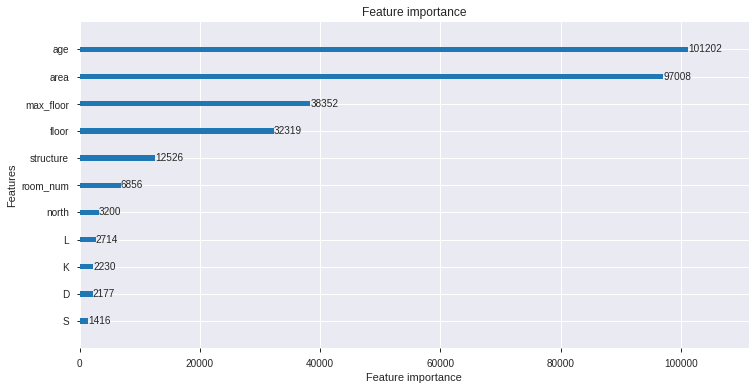

In [96]:
lgb.plot_importance(model, figsize=(12, 6))
plt.show()

In [100]:
cv_results = lgb.cv(params, lgb_train, nfold=10,num_boost_round=10000)
cv_results

{'rmse-mean': [68466.50903282168,
  63903.7237326668,
  59941.46698340455,
  56416.4428309586,
  53424.475591025606,
  50706.138532620054,
  48321.81979476526,
  46268.036059209844,
  44502.69508788133,
  42857.966495867746,
  41598.0352347007,
  40484.49184937177,
  39483.87915352755,
  38656.393905819874,
  37897.70804769767,
  37269.65025026125,
  36747.80499981584,
  36259.34637632163,
  35891.96707836604,
  35576.51266141792,
  35257.88795453733,
  35001.84263805575,
  34784.25513116875,
  34612.81479765314,
  34452.69949121111,
  34323.60515631844,
  34239.4607624646,
  34117.98956560083,
  34005.02378394144,
  33921.70517335294,
  33842.224624108574,
  33786.07100551254,
  33741.648414504045,
  33659.350766310476,
  33592.75444925486,
  33542.82393235241,
  33496.653282971405,
  33484.28694495121,
  33446.39881994053,
  33399.143611265004,
  33375.41103116084,
  33305.714124233346,
  33274.005168606884,
  33220.15638116249,
  33145.69867401961,
  33136.81374591546,
  33109.25957

In [102]:
cv_logloss = cv_results['rmse-mean']
round_n = np.arange(len(cv_logloss))

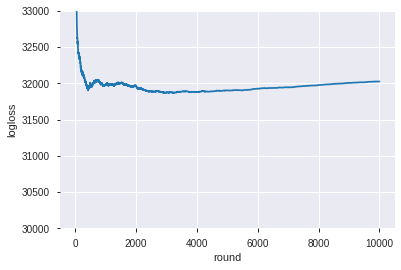

In [106]:
plt.xlabel('round')
plt.ylabel('logloss')
plt.plot(round_n, cv_logloss)
plt.ylim(30000,33000)
plt.show()